-----------------------------------------------------------------------------------------------------------------------
# **Diabetes Prediction**
-----------------------------------------------------------------------------------------------------------------------

## **Importing the libraries and overview of the dataset**

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Load the dataset:
df = pd.read_csv('/content/Healthcare-Diabetes.csv')

In [39]:
#Examine the first 5 records:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


### **Checking the info of the dataset**

In [40]:
#View the information on the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


**Let's check the unique values in each column**

In [42]:
# Checking the count of unique values in each column:
df.nunique()
cols=df.columns
df[cols].nunique()

Id                          2768
Pregnancies                   17
Glucose                      136
BloodPressure                 47
SkinThickness                 53
Insulin                      187
BMI                          253
DiabetesPedigreeFunction     523
Age                           52
Outcome                        2
dtype: int64

In [7]:
# Checking summary statistics
df[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2768.0,1384.500000,799.197097,1.000,692.750,1384.500,2076.250,2768.00
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000,6.000,17.00
Glucose,2768.0,121.102601,32.036508,0.000,99.000,117.000,141.000,199.00
BloodPressure,2768.0,69.134393,19.231438,0.000,62.000,72.000,80.000,122.00
SkinThickness,2768.0,20.824422,16.059596,0.000,0.000,23.000,32.000,110.00
Insulin,2768.0,80.127890,112.301933,0.000,0.000,37.000,130.000,846.00
BMI,2768.0,32.137392,8.076127,0.000,27.300,32.200,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


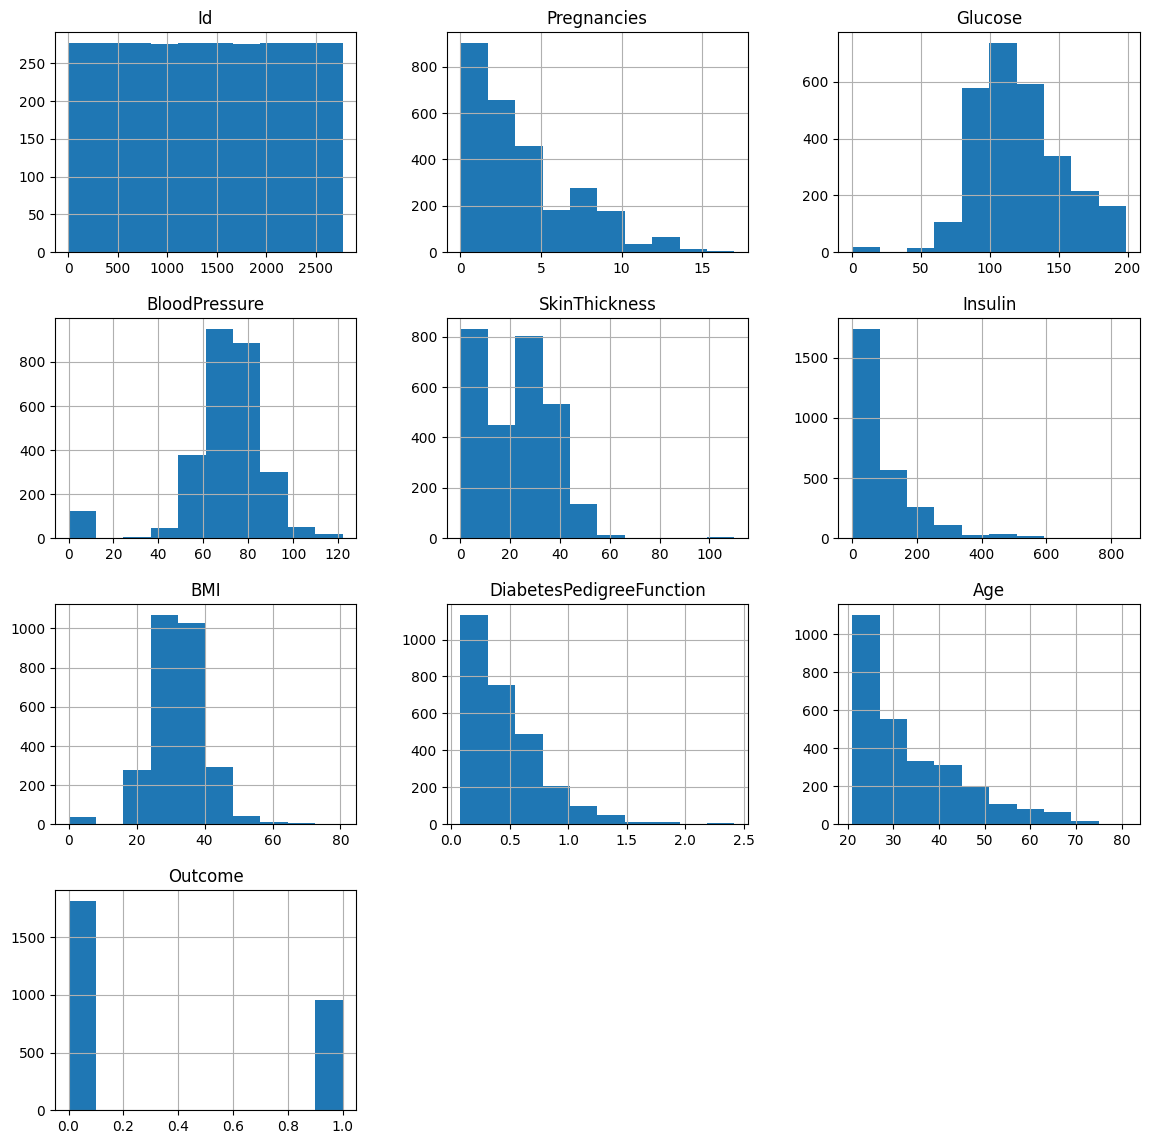

In [8]:
# Creating histograms
df[cols].hist(figsize = (14, 14))

plt.show()

### **Data preparation**

In [43]:
# Separating the independent and dependent variables:

Y = df.Outcome

X = df.drop(['Outcome'], axis = 1)

In [44]:
# Splitting the data using train and test set:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [45]:
# Creating metric function

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'])
    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [46]:
def model_performance_classification(model, predictors, target):

    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')

    precision = precision_score(target, pred, average = 'macro')

    acc = accuracy_score(target, pred)

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )

    return df_perf

In [47]:
# Building Decision Tree:
dt = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

In [48]:
# Fitting decision tree model:
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1271
           1       1.00      1.00      1.00       666

    accuracy                           1.00      1937
   macro avg       1.00      1.00      1.00      1937
weighted avg       1.00      1.00      1.00      1937



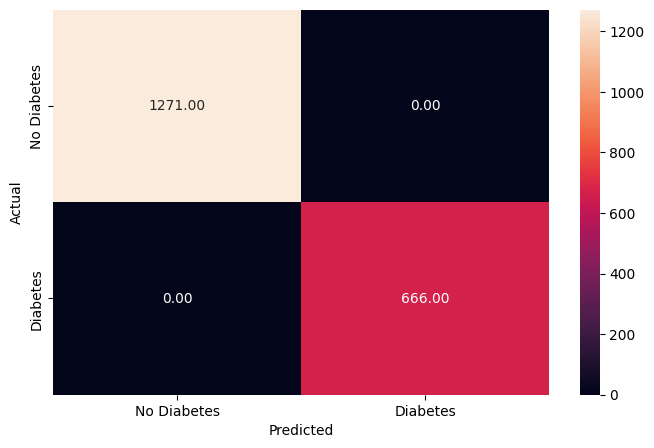

In [49]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       545
           1       0.97      0.96      0.97       286

    accuracy                           0.98       831
   macro avg       0.98      0.97      0.97       831
weighted avg       0.98      0.98      0.98       831



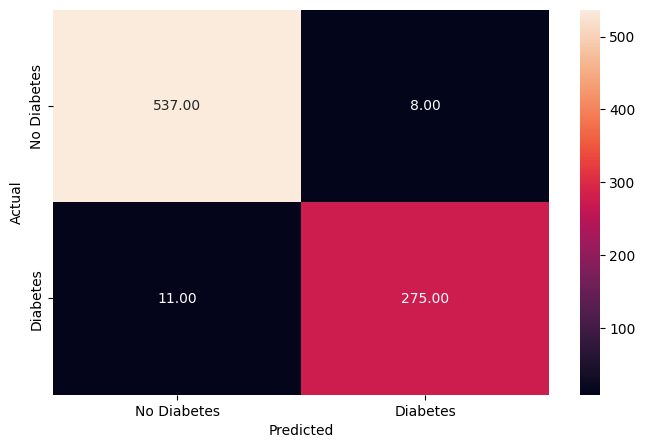

In [50]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [51]:
dtree_test = model_performance_classification(dt,x_test,y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.975829,0.97343,0.977136


In [52]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

importance_df

,Importance
Glucose,0.278709
Age,0.159635
DiabetesPedigreeFunction,0.152496
BMI,0.147377
SkinThickness,0.117673
BloodPressure,0.056708
Pregnancies,0.039607
Insulin,0.035152
Id,0.012644


In [54]:
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }
scorer = metrics.make_scorer(recall_score, pos_label = 1)


gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

gridCV = gridCV.fit(x_train, y_train)

dtree_estimator = gridCV.best_estimator_

dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, criterion='entropy',
                       max_depth=2, min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.99      0.21      0.35      1271
           1       0.40      1.00      0.57       666

    accuracy                           0.48      1937
   macro avg       0.69      0.60      0.46      1937
weighted avg       0.79      0.48      0.43      1937



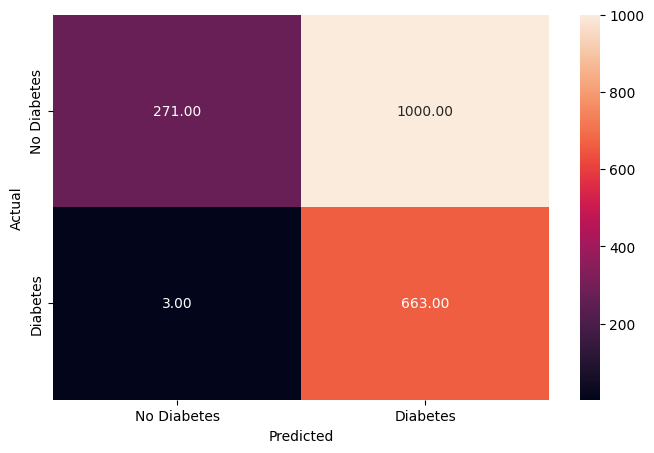

In [55]:
y_train_pred_dt = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       1.00      0.21      0.34       545
           1       0.40      1.00      0.57       286

    accuracy                           0.48       831
   macro avg       0.70      0.60      0.46       831
weighted avg       0.79      0.48      0.42       831



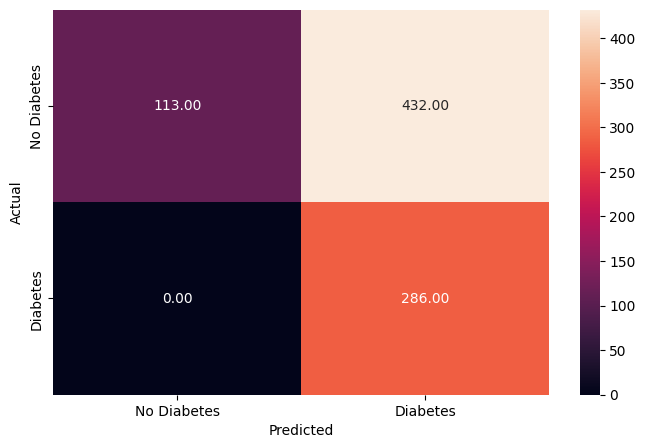

In [56]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [57]:
dtree_tuned_test = model_performance_classification(dtree_estimator,x_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.699164,0.60367,0.480144


In [59]:
importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

importance_df

,Importance
Glucose,0.766853
BMI,0.233147
Id,0.000000
Pregnancies,0.000000
BloodPressure,0.000000
SkinThickness,0.000000
Insulin,0.000000
DiabetesPedigreeFunction,0.000000
Age,0.000000


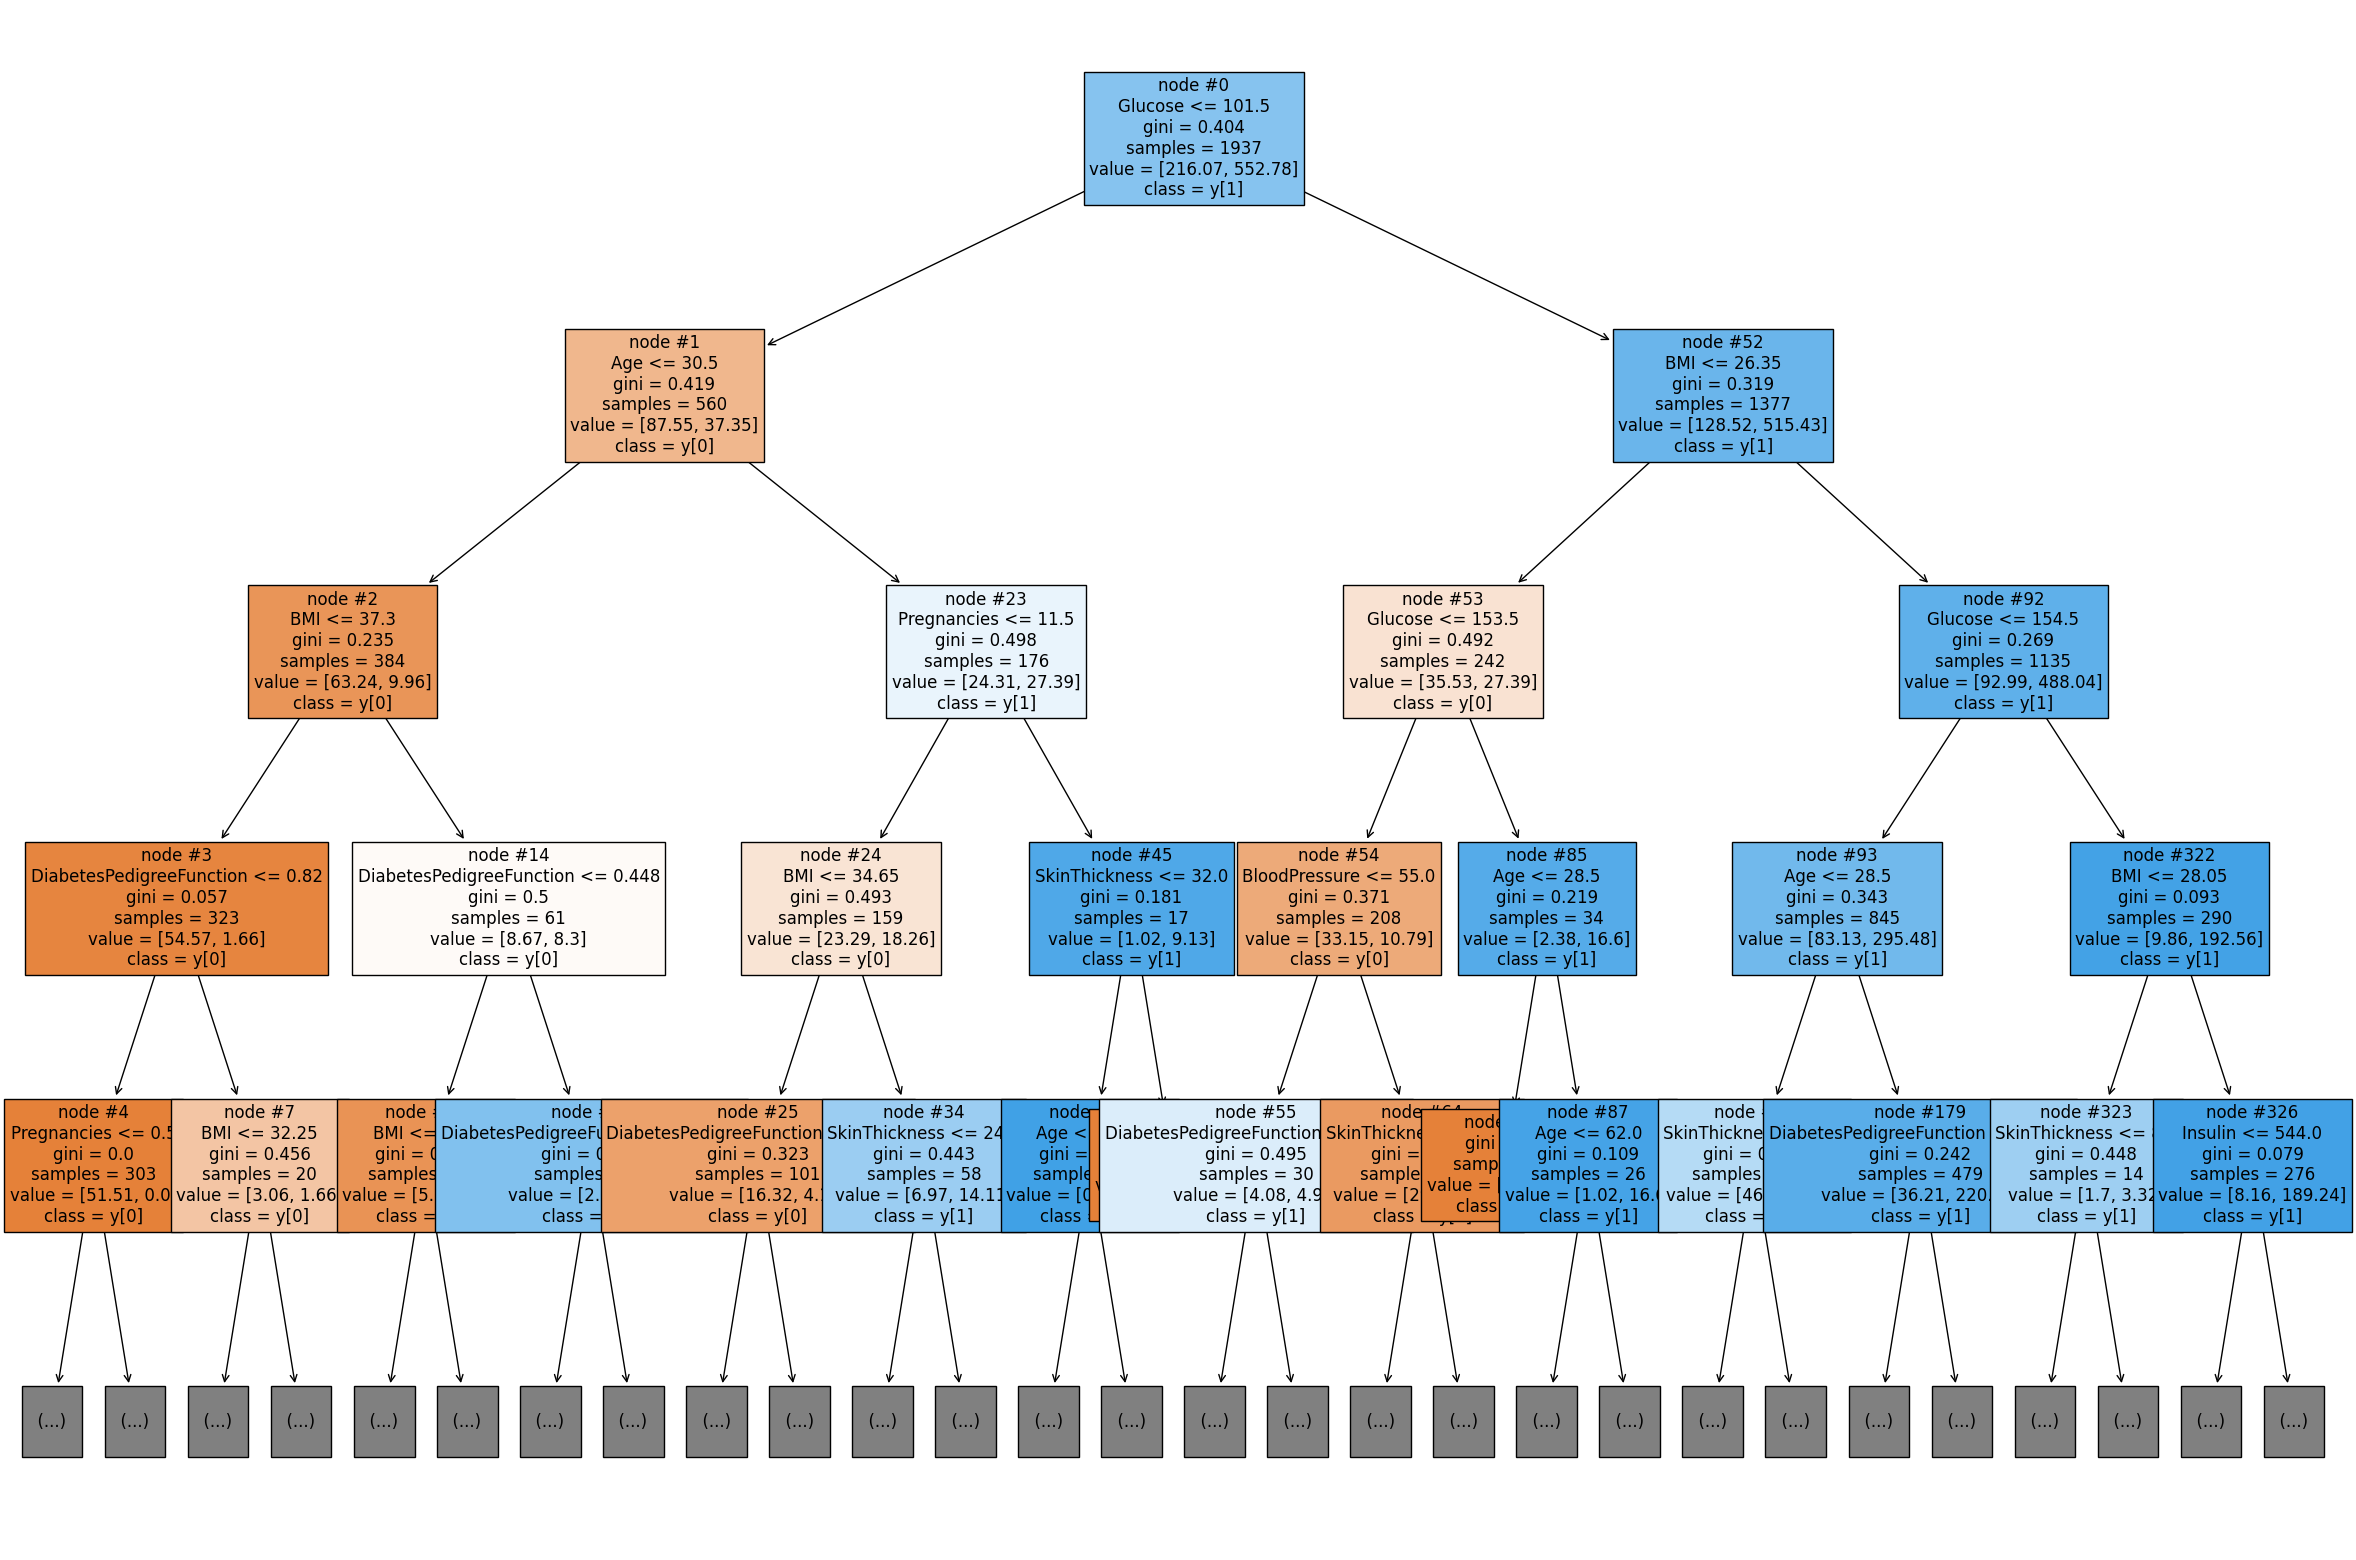

In [61]:
features = list(X.columns)
plt.figure(figsize=(30,20))
tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       354
           1       1.00      1.00      1.00       190

    accuracy                           1.00       544
   macro avg       1.00      1.00      1.00       544
weighted avg       1.00      1.00      1.00       544



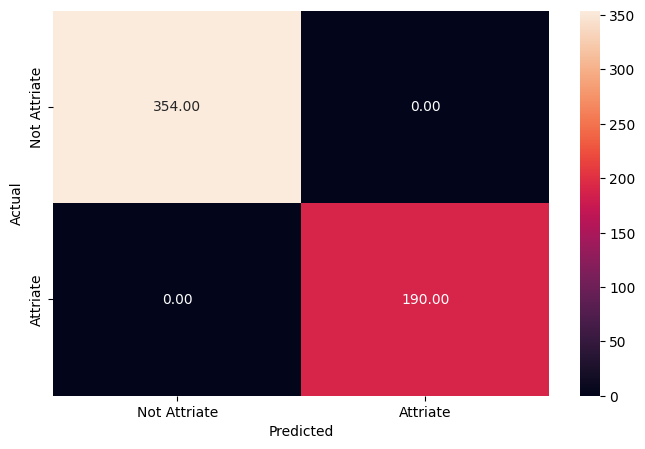

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.75      0.85      0.79       152
           1       0.62      0.46      0.53        82

    accuracy                           0.71       234
   macro avg       0.68      0.66      0.66       234
weighted avg       0.70      0.71      0.70       234



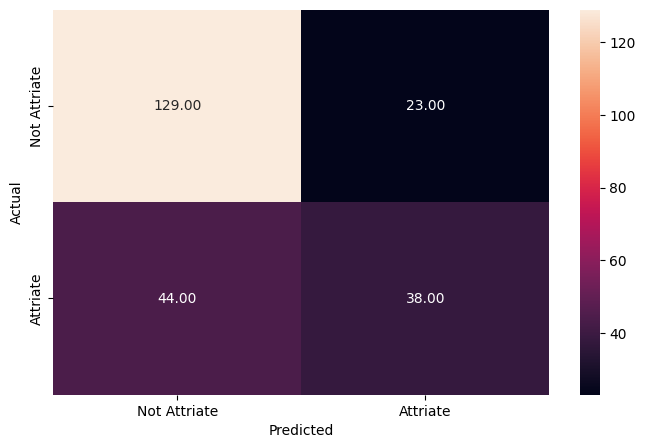

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

In [ ]:
rf_estimator_test = model_performance_classification(rf_estimator,x_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.684308,0.656049,0.713675


In [ ]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

importance_df

,Importance
Glucose,0.257008
BMI,0.179187
Age,0.152312
DiabetesPedigreeFunction,0.108094
BloodPressure,0.090241
SkinThickness,0.074807
Pregnancies,0.072937
Insulin,0.065413


<Figure size 1300x1300 with 0 Axes>

In [25]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, max_features=0.9,
                       min_samples_leaf=3, n_estimators=250, random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1271
           1       0.98      1.00      0.99       666

    accuracy                           0.99      1937
   macro avg       0.99      0.99      0.99      1937
weighted avg       0.99      0.99      0.99      1937



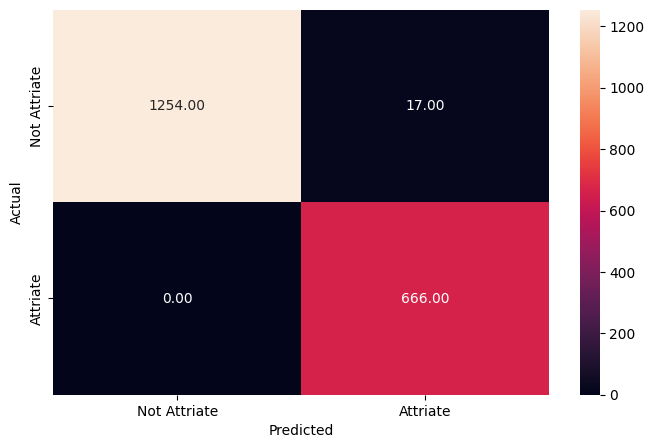

In [26]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       545
           1       0.90      0.96      0.93       286

    accuracy                           0.95       831
   macro avg       0.94      0.95      0.95       831
weighted avg       0.95      0.95      0.95       831



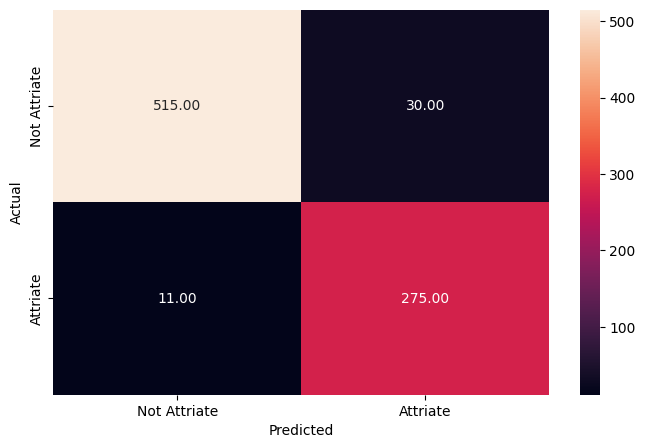

In [27]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

In [28]:
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned, x_test, y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.940363,0.953246,0.950662


In [29]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))
importance_df

,Importance
Glucose,0.301920
BMI,0.189814
Age,0.136905
DiabetesPedigreeFunction,0.110482
BloodPressure,0.064664
SkinThickness,0.061290
Pregnancies,0.054795
Insulin,0.052223
Id,0.027907


<Figure size 1300x1300 with 0 Axes>

In [62]:
# Installing the xgboost library using the 'pip' command.
!pip install xgboost

In [63]:
# Importing the AdaBoostClassifier and GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

In [32]:
# Adaboost Classifier
adaboost_model = AdaBoostClassifier(random_state = 1)

# Fitting the model
adaboost_model.fit(x_train, y_train)

# Model Performance on the test data
adaboost_model_perf_test = model_performance_classification(adaboost_model,x_test,y_test)


adaboost_model_perf_test

,Precision,Recall,Accuracy
0,0.774009,0.752387,0.791817


In [33]:
# Gradient Boost Classifier
gbc = GradientBoostingClassifier(random_state = 1)

# Fitting the model
gbc.fit(x_train, y_train)

# Model Performance on the test data
gbc_perf_test = model_performance_classification(gbc, x_test, y_test)

gbc_perf_test

,Precision,Recall,Accuracy
0,0.875132,0.837948,0.872443


In [34]:
# XGBoost Classifier
xgb = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb.fit(x_train,y_train)

# Model Performance on the test data
xgb_perf_test = model_performance_classification(xgb,x_test,y_test)

xgb_perf_test

,Precision,Recall,Accuracy
0,0.96668,0.961105,0.967509


In [37]:
models_test_comp_df = pd.concat(

    [
    dtree_test.T, dtree_tuned_test.T,
    rf_estimator_tuned_test.T, adaboost_model_perf_test.T,
    gbc_perf_test.T, xgb_perf_test.T
    ],

    axis = 1,
)

models_test_comp_df.columns = [
    "Decision Tree classifier",
    "Tuned Decision Tree classifier",
    "Tuned Random Forest classifier",
    "Adaboost classifier",
    "Gradientboost classifier",
    "XGBoost classifier"
]

print("Test performance comparison:")

Test performance comparison:


In [38]:
models_test_comp_df

,Decision Tree classifier,Tuned Decision Tree classifier,Tuned Random Forest classifier,Adaboost classifier,Gradientboost classifier,XGBoost classifier
Precision,0.975829,0.699164,0.940363,0.774009,0.875132,0.966680
Recall,0.973430,0.603670,0.953246,0.752387,0.837948,0.961105
Accuracy,0.977136,0.480144,0.950662,0.791817,0.872443,0.967509
